# Eigenvalues and eigenfunctions

Computing the eigenvectors $\psi(x)$ and eigenvalues $E$ of some Hamiltonian $H$ belongs to the key problems of quantum mechanics. For the one-dimensional Schrödinger equation we have to solve
\begin{equation}
E\psi(x) = H\psi(x) = -\frac{1}{2}\frac{\mathrm{d}^2\psi(x)}{\mathrm{d} x^2} + V(x)\psi(x)
\end{equation}for some given potential $V(x)$. Analytical solutions, however, are scare goods. Thus, one has to rely on approximations or numerical methods.


In principle, numerical approaches are straight forward. Just replace the Hermitian Hamiltonian by some Hermitian matrix by discretizing the differential operators, e.g., by finite differences or pseudospectral methods. Then utilize the computational routines of your favorite computational linear algebra package to solve the eigenvalue problem. Often  these packages are equipped with special routines that can take advantage of hermiticity. Below I give an example, which calculates the eigenvalues and the eigenvectors of the harmonic oscillator with $V(x)=x^2/2$ in Python. Differentials are approximated via 2nd order finite differences. Numerical results for the discrete Hamiltonian matrix are compared to the known eigenvalues and eigenvectors. One clearly sees that the small eigenvalues are well reproduced. The discrete Hamiltonian features, however, also large eigenvalues and eigenstates which are very different from the eigenvalues and eigenvectors of the related contiguous problem.


Our naive approach works reasonably well. It has, however, a serious drawback. It becomes computationally very demanding as soon as one tries to tackle two- or three-dimensional problems because the matrices become easily very large. So large that one can not compute its eigenvalues and eigenvectors in a reasonable amount of time. Even worse, the matrices may become so large that they no longer fit in the computers main memory. Fortunately, one is usually not interested in all eigenvalues, knowing some, e.g., a few of the smallest ones, might be sufficient. In this case the Lanczos algorithm is often the method of choice. This algorithm basically constructs from the original large Hermitian matrix a smaller tridiagonal symmetric matrix that has eigenvalues that are close to some eigenvalues of the larger original matrix. A further nice feature of the Lanczos algorithm is that it does not require to store the matrix explicitly in memory, a routine that computes matrix-vector products of the matrix is sufficient.

/tmp/ipykernel_10930/2155356055.py:21: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rc('text.latex',


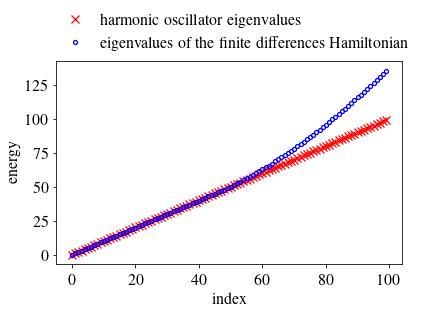

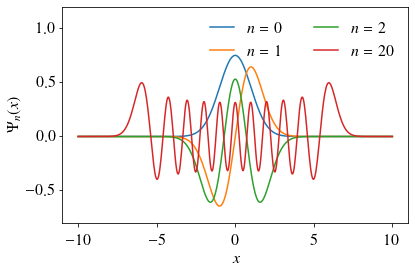

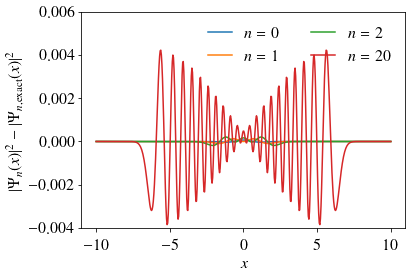

In [1]:
#!/usr/bin/env python
 
# import useful modules
import matplotlib 
from math import factorial
from numpy import *
from pylab import *
from numpy.polynomial.hermite import *
 
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=False)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('lines', lw=1.5)
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', 
              preamble=[r'\usepackage[T1]{fontenc}',
                        r'\usepackage{amsmath}',
                        r'\usepackage{txfonts}',
                        r'\usepackage{textcomp}'])
 
def V(x):
    return 0.5*x**2
 
close('all')
figure(figsize=(6, 4.5))
 
# define grid
N=512                   # number of grid points
x0, x1=-10., 10.        # grid boundaries
dx=(x1-x0)/(N-1)        # grid spacing
x=linspace(x0, x1, N)   # grid points
# setup Hamiltonian
H_kin=zeros([N, N])
for k in range(0, N):
    if k>0:
        H_kin[k-1, k]=-0.5/dx**2
    H_kin[k, k]=1./dx**2
    if k+1<N:
        H_kin[k+1, k]=-0.5/dx**2
H_pot=diag(V(x))
H=H_kin+H_pot
# compute eigenvalues
E=eigvalsh(H)
# plot first eigenvalues
n=100
plot(array(range(0, n)), array(range(0, n))+0.5, 'rx', mew=1.25, ms=8, 
     label='harmonic oscillator eigenvalues')
plot(array(range(0, n)), sort(E)[0:n], '.', mew=1.25, ms=8, mfc='none', mec='b',
     label='eigenvalues of the finite differences Hamiltonian')
xlabel('index')
ylabel('energy')
legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       borderaxespad=0.)
gca().set_position((0.15, 0.15, 0.8, 0.625))
show()
savefig('eigenvalues.png')
 
# compute eigenvectors
E, psi_E=eigh(H)
# plot some eigenvectors
clf()
for n in [0, 1, 2, 20]:
    c=zeros(n+1)
    c[n]=1
    plot(x, psi_E[:, n]/sqrt(dx), 
         label='$n=%i$' % n)
legend(ncol=2)
xlabel(r'$x$')
ylabel(r'$\Psi_n(x)$')
gca().set_ylim(-0.8, 1.2)
gca().set_position((0.15, 0.15, 0.8, 0.75))
show()
savefig('eigenvectors.png')
 
# plot error of some eigenvectors
clf()
for n in [0, 1, 2, 20]:
    c=zeros(n+1)
    c[n]=1
    plot(x, 
         (psi_E[:, n]/sqrt(dx))**2 -
         (hermval(x, c)*exp(-0.5*x**2)/sqrt(sqrt(pi)*2**n*factorial(n)))**2, 
         label='$n=%i$' % n)
legend(ncol=2)
xlabel(r'$x$')
ylabel(r'$|\Psi_n(x)|^2-|\Psi_{n,\mathrm{exact}}(x)|^2$')
gca().set_ylim(-0.004, 0.006)
gca().set_position((0.2, 0.15, 0.75, 0.75))
show()

Errors of the squared absolute value of some eigenvectors of the harmonic oszillator.